In [9]:
#Задание "4. Определить количество пустых ячеек"
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as sc
import seaborn as sbn

path = r'/Titanic-Dataset.csv'
df = pd.read_csv(path)
print('Количество пропусков по полям:\n' + str(df.isnull().sum()))
print('Всего пропусков: ' + str(df.isnull().sum().sum()))

Количество пропусков по полям:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Всего пропусков: 866


In [10]:
#Задание 5. *Заполнить пустые ячейки используя любую логику замещения данных
nadict = {}
for col in df.columns:
  if df[col].isnull().sum() != 0:
    if df[col].dtypes == 'object':
      nadict[col] = '-'
    elif df[col].dtypes == 'float64':
      nadict[col] = df[col].mean()
    elif df[col].dtypes == 'int64':
      nadict[col] = df[col].mean()
df_new = df.fillna(nadict)

In [11]:
#Задание "7.1 По каждому признаку произвести аналитику" Количество уникальных значений
df_new.nunique ()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

In [12]:
#Задание "7.2 Минимальное и максимальное значение
max_val = df_new.max()
min_val = df_new.min()
print('Максимальные занчения:\n' + str(max_val) +
  '\n\nМинимальные значения:\n' + str(min_val))

Максимальные занчения:
PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                   80.0
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                              512.3292
Cabin                                    T
Embarked                                 S
dtype: object

Минимальные значения:
PassengerId                      1
Survived                         0
Pclass                           1
Name           Abbing, Mr. Anthony
Sex                         female
Age                           0.42
SibSp                            0
Parch                            0
Ticket                      110152
Fare                           0.0
Cabin                            -
Embarked                         -
dtyp

In [16]:
# удалим строки из первоначального датасета для исключения выбросов
df_cor = df.dropna(how='all')
df_cor = df_cor.replace({'Sex':{'male':1, 'female':0}})
df_cor = df_cor.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])

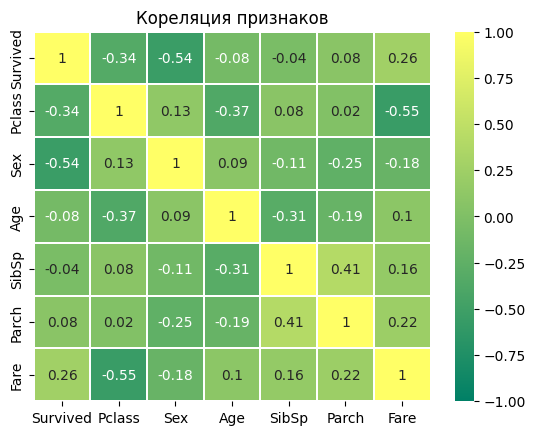

In [32]:
corrP = df_cor.corr(method='pearson', numeric_only=True).round(2)
sbn.heatmap(corrP, annot=True, vmax=1, vmin=-1, center=0, cmap='summer', linewidths=0.2).set_title('Кореляция признаков')
plt.show()

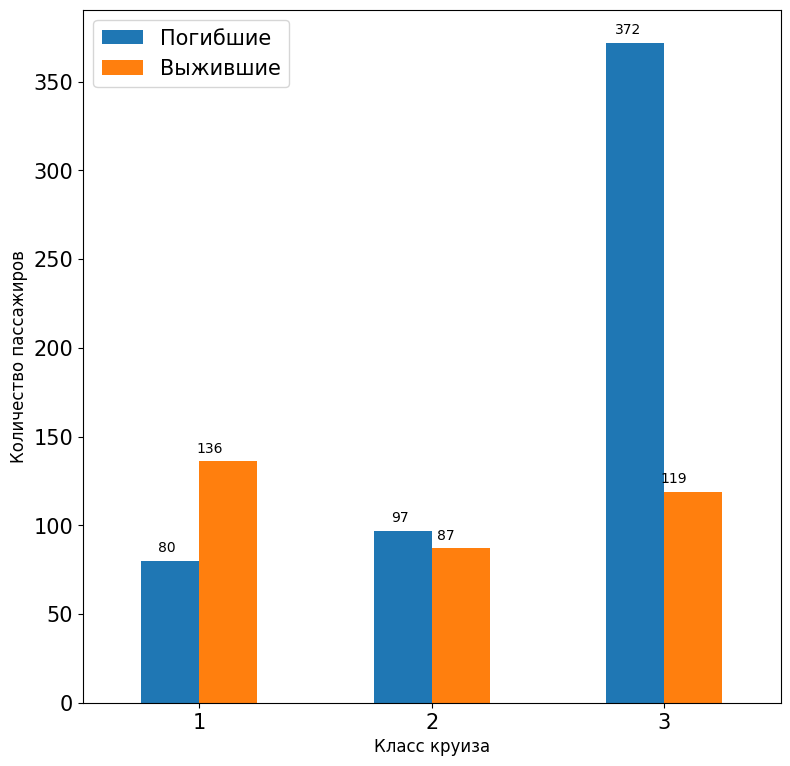

In [36]:
gf1 = df_cor.groupby(['Pclass', 'Survived'])['Survived'].count()
fg = gf1.unstack().plot(kind='bar', figsize=(9, 9), fontsize=15, rot=0)
fg.set_ylabel('Количество пассажиров', fontsize=12)
fg.set_xlabel('Класс круиза', fontsize=12)
fg.legend(['Погибшие', 'Выжившие'], fontsize=15)
h=[-0.1, 0.1, 0.9, 1.1, 1.9, 2.1]
for i, val in enumerate(gf1.values):
  fg.text(h[i], val+5, val, horizontalalignment='right')
plt.show()